In [74]:
%%time
# catboost 120 iterations ~ 10 mins, no effect
tuned = tune_model(default, n_iter=120)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.6726,5.7590,2.3998,0.8745,0.4381,0.5545
1,1.5522,5.1512,2.2696,0.9156,0.4321,0.4837
2,1.6835,8.4979,2.9151,0.8464,0.4406,0.3915
3,1.7807,7.1529,2.6745,0.8832,0.4156,0.4367
4,1.4754,3.4020,1.8445,0.9454,0.4030,0.5545
5,1.5391,4.9219,2.2185,0.9198,0.4605,0.5597
6,1.5042,4.6452,2.1553,0.9017,0.4372,0.4973
7,1.8051,7.4039,2.7210,0.8591,0.3975,0.5100
8,1.6802,7.7321,2.7807,0.8599,0.3964,0.5027


Fitting 10 folds for each of 120 candidates, totalling 1200 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
CPU times: total: 29.2 s
Wall time: 10min 4s


## PyCaret Pt 2
 - classification: generate final model list, tune one last time, run kNN feature selection study
   - kNN feature selection
     - 6,7,8 best. 7 slight edge.
   - tune final models with more iterations
     - *all data*: rf, et, gbc, xgboost, lightgbm
       - 60 iterations (4 mins): does not improve et, rf
     - *select 6*: kNN, lda, nb, logreg
       - 90 iterations good. does not help lda
   - final models
     - extra trees, XGB, kNN, log reg
       - *extra trees doesn't need tuning*
 - regression: generate final model list, tune one last time with more iterations
   - *all data*: random forest, extra trees, gradient boosting, XGB, CatBoost, Huber
     - **60 iterations (10 mins): CatBoost and Extra Trees *did not* change hyperparameters, others improved**
   - *select 6 features*: linear regression, ridge least angle, bayesian ridge, kNN
     - **90 iterations: only kNN and Ridge changed hyperparameters, both improved**
   - final models:
     - CatBoost, XGB, kNN, Ridge
       - *catboost doesn't need tuning*

In [76]:
from IPython.display import display
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
np.random.seed(42)

In [77]:
import pycaret
pycaret.__version__

'3.1.0'

In [78]:
d = pd.read_parquet('data/game_stats.parquet')
data = d.iloc[:,6:]
data.sample(2).T

,1544,2693
home_completions,185,259
away_completions,307,296
home_throws,209,279
away_throws,327,320
home_blocks,7,12
away_blocks,14,12
home_turnovers,24,20
away_turnovers,20,24
home_completion_rate,0.885167,0.928315
away_completion_rate,0.938838,0.925


### Classification

#### kNN Feature Selection Study
 - 6-8 features best, 7 has max score
   - will continue with 6 to include other models
 - univariate (SelectKBest) better than classic (model based)
   - could try different model

In [79]:
from pycaret.classification import *

In [106]:
knn_models = {}

for features in [3,4,5,6,7,8,10,12]:
    for method in ['classic','univariate']:
        s = setup(data.drop(columns='home_margin'), target = 'home_win', session_id = 42, train_size=0.8,
                  feature_selection=True, feature_selection_method=method, n_features_to_select=features)
        knn = create_model('knn')
        knn = tune_model(knn, n_iter=60)
        knn = compare_models([knn])
        knn_models[f'{method}_{features}'] = pull()

,Description,Value
0,Session id,42
1,Target,home_win
2,Target type,Binary
3,Original data shape,"(1521, 13)"
4,Transformed data shape,"(1521, 4)"
5,Transformed train set shape,"(1216, 4)"
6,Transformed test set shape,"(305, 4)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9098,0.9703,0.9286,0.9155,0.9220,0.8152,0.8153
1,0.8852,0.9547,0.9143,0.8889,0.9014,0.7642,0.7647
2,0.8689,0.9283,0.8857,0.8857,0.8857,0.7319,0.7319
3,0.8852,0.9418,0.8714,0.9242,0.8971,0.7677,0.7694
4,0.8934,0.9685,0.9143,0.9014,0.9078,0.7816,0.7817
5,0.8443,0.9445,0.8592,0.8714,0.8652,0.6808,0.6809
6,0.8678,0.9623,0.9000,0.8750,0.8873,0.7274,0.7278
7,0.9008,0.9352,0.9143,0.9143,0.9143,0.7966,0.7966
8,0.8595,0.8983,0.8571,0.8955,0.8759,0.7142,0.7151


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9180,0.9790,0.9429,0.9167,0.9296,0.8316,0.8321
1,0.9180,0.9727,0.9714,0.8947,0.9315,0.8299,0.8343
2,0.8852,0.9600,0.9000,0.9000,0.9000,0.7654,0.7654
3,0.9098,0.9577,0.8857,0.9538,0.9185,0.8179,0.8207
4,0.9180,0.9801,0.9143,0.9412,0.9275,0.8332,0.8337
5,0.8770,0.9569,0.8592,0.9242,0.8905,0.7507,0.7534
6,0.9091,0.9679,0.9429,0.9041,0.9231,0.8121,0.8132
7,0.9008,0.9604,0.9286,0.9028,0.9155,0.7956,0.7960
8,0.8347,0.9188,0.8714,0.8472,0.8592,0.6593,0.6596


Fitting 10 folds for each of 60 candidates, totalling 600 fits


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,K Neighbors Classifier,0.8955,0.9617,0.9102,0.9097,0.9094,0.7860,0.7873,0.0590


,Description,Value
0,Session id,42
1,Target,home_win
2,Target type,Binary
3,Original data shape,"(1521, 13)"
4,Transformed data shape,"(1521, 4)"
5,Transformed train set shape,"(1216, 4)"
6,Transformed test set shape,"(305, 4)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9098,0.9606,0.9286,0.9155,0.9220,0.8152,0.8153
1,0.8934,0.9375,0.9286,0.8904,0.9091,0.7805,0.7815
2,0.9016,0.9547,0.8857,0.9394,0.9118,0.8009,0.8026
3,0.8852,0.9372,0.8714,0.9242,0.8971,0.7677,0.7694
4,0.9016,0.9500,0.9143,0.9143,0.9143,0.7989,0.7989
5,0.8934,0.9631,0.9014,0.9143,0.9078,0.7816,0.7817
6,0.8760,0.9520,0.9286,0.8667,0.8966,0.7424,0.7451
7,0.9091,0.9286,0.9143,0.9275,0.9209,0.8141,0.8142
8,0.8843,0.9223,0.9000,0.9000,0.9000,0.7627,0.7627


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9426,0.9815,0.9571,0.9437,0.9504,0.8824,0.8825
1,0.9180,0.9690,0.9714,0.8947,0.9315,0.8299,0.8343
2,0.9098,0.9688,0.9429,0.9041,0.9231,0.8143,0.8153
3,0.9180,0.9646,0.9143,0.9412,0.9275,0.8332,0.8337
4,0.9180,0.9808,0.9143,0.9412,0.9275,0.8332,0.8337
5,0.9016,0.9652,0.8732,0.9538,0.9118,0.8011,0.8051
6,0.9091,0.9794,0.9571,0.8933,0.9241,0.8111,0.8141
7,0.8926,0.9538,0.9143,0.9014,0.9078,0.7791,0.7792
8,0.8512,0.9394,0.8714,0.8714,0.8714,0.6950,0.6950


Fitting 10 folds for each of 60 candidates, totalling 600 fits


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,K Neighbors Classifier,0.9037,0.9660,0.9202,0.9143,0.9167,0.8026,0.8039,0.0160


[LightGBM] [Info] Number of positive: 701, number of negative: 515
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000180 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1705
[LightGBM] [Info] Number of data points in the train set: 1216, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.576480 -> initscore=0.308341
[LightGBM] [Info] Start training from score 0.308341
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


,Description,Value
0,Session id,42
1,Target,home_win
2,Target type,Binary
3,Original data shape,"(1521, 13)"
4,Transformed data shape,"(1521, 5)"
5,Transformed train set shape,"(1216, 5)"
6,Transformed test set shape,"(305, 5)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8934,0.9676,0.9000,0.9130,0.9065,0.7827,0.7828
1,0.8852,0.9437,0.9286,0.8784,0.9028,0.7630,0.7648
2,0.8852,0.9374,0.9143,0.8889,0.9014,0.7642,0.7647
3,0.8689,0.9016,0.8571,0.9091,0.8824,0.7345,0.7361
4,0.8934,0.9641,0.8857,0.9254,0.9051,0.7837,0.7847
5,0.8689,0.9296,0.8873,0.8873,0.8873,0.7305,0.7305
6,0.8595,0.9476,0.9143,0.8533,0.8828,0.7080,0.7106
7,0.8760,0.9318,0.9000,0.8873,0.8936,0.7451,0.7452
8,0.8430,0.9251,0.8714,0.8592,0.8652,0.6772,0.6772


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9098,0.9786,0.9286,0.9155,0.9220,0.8152,0.8153
1,0.8934,0.9709,0.9571,0.8701,0.9116,0.7783,0.7839
2,0.8770,0.9618,0.8857,0.8986,0.8921,0.7492,0.7494
3,0.9098,0.9591,0.8714,0.9683,0.9173,0.8188,0.8243
4,0.9098,0.9755,0.8857,0.9538,0.9185,0.8179,0.8207
5,0.8852,0.9337,0.9014,0.9014,0.9014,0.7642,0.7642
6,0.8926,0.9557,0.9429,0.8800,0.9103,0.7767,0.7796
7,0.9091,0.9560,0.9143,0.9275,0.9209,0.8141,0.8142
8,0.8595,0.9216,0.9000,0.8630,0.8811,0.7096,0.7105


Fitting 10 folds for each of 60 candidates, totalling 600 fits


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,K Neighbors Classifier,0.8922,0.9572,0.9073,0.9077,0.9067,0.7790,0.7809,0.0570


,Description,Value
0,Session id,42
1,Target,home_win
2,Target type,Binary
3,Original data shape,"(1521, 13)"
4,Transformed data shape,"(1521, 5)"
5,Transformed train set shape,"(1216, 5)"
6,Transformed test set shape,"(305, 5)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9426,0.9720,0.9286,0.9701,0.9489,0.8836,0.8847
1,0.9426,0.9826,1.0000,0.9091,0.9524,0.8806,0.8870
2,0.9344,0.9713,0.9429,0.9429,0.9429,0.8659,0.8659
3,0.9262,0.9578,0.9143,0.9552,0.9343,0.8503,0.8513
4,0.9672,0.9970,0.9429,1.0000,0.9706,0.9336,0.9357
5,0.9344,0.9778,0.9437,0.9437,0.9437,0.8652,0.8652
6,0.9256,0.9619,0.9571,0.9178,0.9371,0.8463,0.8474
7,0.9339,0.9647,0.9429,0.9429,0.9429,0.8644,0.8644
8,0.8678,0.9273,0.9286,0.8553,0.8904,0.7245,0.7284


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9426,0.9824,0.9286,0.9701,0.9489,0.8836,0.8847
1,0.9426,0.9806,1.0000,0.9091,0.9524,0.8806,0.8870
2,0.9344,0.9794,0.9429,0.9429,0.9429,0.8659,0.8659
3,0.9262,0.9547,0.9143,0.9552,0.9343,0.8503,0.8513
4,0.9590,0.9946,0.9286,1.0000,0.9630,0.9172,0.9204
5,0.9344,0.9783,0.9296,0.9565,0.9429,0.8660,0.8665
6,0.9256,0.9689,0.9571,0.9178,0.9371,0.8463,0.8474
7,0.9339,0.9605,0.9429,0.9429,0.9429,0.8644,0.8644
8,0.8678,0.9360,0.9286,0.8553,0.8904,0.7245,0.7284


Fitting 10 folds for each of 60 candidates, totalling 600 fits


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,K Neighbors Classifier,0.9317,0.9709,0.9415,0.9420,0.9411,0.8598,0.8615,0.0220


[LightGBM] [Info] Number of positive: 701, number of negative: 515
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000170 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1705
[LightGBM] [Info] Number of data points in the train set: 1216, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.576480 -> initscore=0.308341
[LightGBM] [Info] Start training from score 0.308341
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


,Description,Value
0,Session id,42
1,Target,home_win
2,Target type,Binary
3,Original data shape,"(1521, 13)"
4,Transformed data shape,"(1521, 6)"
5,Transformed train set shape,"(1216, 6)"
6,Transformed test set shape,"(305, 6)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8607,0.9187,0.8429,0.9077,0.8741,0.7186,0.7211
1,0.8852,0.9430,0.9286,0.8784,0.9028,0.7630,0.7648
2,0.8361,0.9181,0.8857,0.8378,0.8611,0.6615,0.6630
3,0.8607,0.9080,0.8429,0.9077,0.8741,0.7186,0.7211
4,0.8934,0.9589,0.8857,0.9254,0.9051,0.7837,0.7847
5,0.8689,0.9296,0.8873,0.8873,0.8873,0.7305,0.7305
6,0.8595,0.9476,0.9143,0.8533,0.8828,0.7080,0.7106
7,0.8595,0.9178,0.8714,0.8841,0.8777,0.7127,0.7128
8,0.8347,0.9224,0.8571,0.8571,0.8571,0.6611,0.6611


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9016,0.9742,0.9429,0.8919,0.9167,0.7969,0.7987
1,0.8934,0.9709,0.9571,0.8701,0.9116,0.7783,0.7839
2,0.8689,0.9530,0.9143,0.8649,0.8889,0.7292,0.7309
3,0.8934,0.9585,0.8571,0.9524,0.9023,0.7858,0.7911
4,0.9098,0.9739,0.8857,0.9538,0.9185,0.8179,0.8207
5,0.8852,0.9343,0.9014,0.9014,0.9014,0.7642,0.7642
6,0.8926,0.9585,0.9429,0.8800,0.9103,0.7767,0.7796
7,0.8760,0.9437,0.9143,0.8767,0.8951,0.7438,0.7447
8,0.8595,0.9216,0.9000,0.8630,0.8811,0.7096,0.7105


Fitting 10 folds for each of 60 candidates, totalling 600 fits


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,K Neighbors Classifier,0.8857,0.9548,0.9101,0.8953,0.9018,0.7649,0.7671,0.0590


,Description,Value
0,Session id,42
1,Target,home_win
2,Target type,Binary
3,Original data shape,"(1521, 13)"
4,Transformed data shape,"(1521, 6)"
5,Transformed train set shape,"(1216, 6)"
6,Transformed test set shape,"(305, 6)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9180,0.9727,0.9143,0.9412,0.9275,0.8332,0.8337
1,0.9672,0.9757,0.9857,0.9583,0.9718,0.9326,0.9332
2,0.9180,0.9537,0.9286,0.9286,0.9286,0.8324,0.8324
3,0.9098,0.9522,0.8857,0.9538,0.9185,0.8179,0.8207
4,0.9180,0.9891,0.9000,0.9545,0.9265,0.8341,0.8359
5,0.9262,0.9677,0.9296,0.9429,0.9362,0.8488,0.8489
6,0.9339,0.9648,0.9857,0.9079,0.9452,0.8622,0.8669
7,0.9339,0.9674,0.9286,0.9559,0.9420,0.8651,0.8656
8,0.8926,0.9528,0.9286,0.8904,0.9091,0.7779,0.7789


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9344,0.9596,0.9286,0.9559,0.9420,0.8666,0.8671
1,0.9590,0.9728,0.9857,0.9452,0.9650,0.9156,0.9168
2,0.9098,0.9495,0.9000,0.9403,0.9197,0.8170,0.8180
3,0.9016,0.9484,0.8857,0.9394,0.9118,0.8009,0.8026
4,0.9344,0.9777,0.9143,0.9697,0.9412,0.8672,0.8692
5,0.9344,0.9629,0.9437,0.9437,0.9437,0.8652,0.8652
6,0.9256,0.9630,0.9714,0.9067,0.9379,0.8454,0.8486
7,0.9339,0.9522,0.9286,0.9559,0.9420,0.8651,0.8656
8,0.8843,0.9263,0.9286,0.8784,0.9028,0.7602,0.7620


Fitting 10 folds for each of 60 candidates, totalling 600 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,K Neighbors Classifier,0.9260,0.9668,0.9330,0.9390,0.9355,0.8486,0.8498,0.0150


[LightGBM] [Info] Number of positive: 701, number of negative: 515
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000119 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1705
[LightGBM] [Info] Number of data points in the train set: 1216, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.576480 -> initscore=0.308341
[LightGBM] [Info] Start training from score 0.308341
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


,Description,Value
0,Session id,42
1,Target,home_win
2,Target type,Binary
3,Original data shape,"(1521, 13)"
4,Transformed data shape,"(1521, 7)"
5,Transformed train set shape,"(1216, 7)"
6,Transformed test set shape,"(305, 7)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8525,0.9106,0.8429,0.8939,0.8676,0.7013,0.7029
1,0.8607,0.9290,0.9143,0.8533,0.8828,0.7115,0.7141
2,0.8361,0.9181,0.8857,0.8378,0.8611,0.6615,0.6630
3,0.8689,0.9092,0.8571,0.9091,0.8824,0.7345,0.7361
4,0.8361,0.8889,0.8286,0.8788,0.8529,0.6681,0.6696
5,0.8197,0.9017,0.8451,0.8451,0.8451,0.6294,0.6294
6,0.8595,0.9476,0.9143,0.8533,0.8828,0.7080,0.7106
7,0.8595,0.9178,0.8714,0.8841,0.8777,0.7127,0.7128
8,0.8430,0.9190,0.8714,0.8592,0.8652,0.6772,0.6772


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8934,0.9558,0.9286,0.8904,0.9091,0.7805,0.7815
1,0.8607,0.9577,0.9286,0.8442,0.8844,0.7101,0.7152
2,0.8689,0.9440,0.9143,0.8649,0.8889,0.7292,0.7309
3,0.8770,0.9456,0.8571,0.9231,0.8889,0.7517,0.7543
4,0.8607,0.9283,0.8714,0.8841,0.8777,0.7158,0.7159
5,0.8607,0.9401,0.9155,0.8553,0.8844,0.7096,0.7122
6,0.8926,0.9577,0.9286,0.8904,0.9091,0.7779,0.7789
7,0.8760,0.9423,0.9000,0.8873,0.8936,0.7451,0.7452
8,0.8595,0.9364,0.8857,0.8732,0.8794,0.7111,0.7112


Fitting 10 folds for each of 60 candidates, totalling 600 fits


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,K Neighbors Classifier,0.8734,0.9467,0.9015,0.8825,0.8914,0.7395,0.7410,0.0530


,Description,Value
0,Session id,42
1,Target,home_win
2,Target type,Binary
3,Original data shape,"(1521, 13)"
4,Transformed data shape,"(1521, 7)"
5,Transformed train set shape,"(1216, 7)"
6,Transformed test set shape,"(305, 7)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9344,0.9650,0.9286,0.9559,0.9420,0.8666,0.8671
1,0.9754,0.9859,1.0000,0.9589,0.9790,0.9493,0.9506
2,0.9016,0.9599,0.9000,0.9265,0.9130,0.7999,0.8003
3,0.9262,0.9533,0.9286,0.9420,0.9353,0.8495,0.8497
4,0.9590,0.9933,0.9429,0.9851,0.9635,0.9168,0.9180
5,0.9180,0.9716,0.9155,0.9420,0.9286,0.8325,0.8329
6,0.9421,0.9615,0.9857,0.9200,0.9517,0.8798,0.8830
7,0.9339,0.9762,0.9429,0.9429,0.9429,0.8644,0.8644
8,0.8926,0.9172,0.9286,0.8904,0.9091,0.7779,0.7789


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9508,0.9867,0.9429,0.9706,0.9565,0.8999,0.9004
1,0.9672,0.9857,1.0000,0.9459,0.9722,0.9323,0.9344
2,0.9098,0.9650,0.9143,0.9275,0.9209,0.8161,0.8162
3,0.9344,0.9676,0.9429,0.9429,0.9429,0.8659,0.8659
4,0.9508,0.9960,0.9286,0.9848,0.9559,0.9004,0.9024
5,0.9344,0.9700,0.9296,0.9565,0.9429,0.8660,0.8665
6,0.9421,0.9843,0.9857,0.9200,0.9517,0.8798,0.8830
7,0.9421,0.9741,0.9429,0.9565,0.9496,0.8817,0.8818
8,0.8843,0.9518,0.9286,0.8784,0.9028,0.7602,0.7620


Fitting 10 folds for each of 60 candidates, totalling 600 fits


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,K Neighbors Classifier,0.9333,0.9756,0.9430,0.9424,0.9423,0.8634,0.8645,0.0160


[LightGBM] [Info] Number of positive: 701, number of negative: 515
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000131 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1705
[LightGBM] [Info] Number of data points in the train set: 1216, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.576480 -> initscore=0.308341
[LightGBM] [Info] Start training from score 0.308341
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


,Description,Value
0,Session id,42
1,Target,home_win
2,Target type,Binary
3,Original data shape,"(1521, 13)"
4,Transformed data shape,"(1521, 8)"
5,Transformed train set shape,"(1216, 8)"
6,Transformed test set shape,"(305, 8)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8197,0.8863,0.8143,0.8636,0.8382,0.6349,0.6363
1,0.8525,0.9213,0.9143,0.8421,0.8767,0.6938,0.6975
2,0.8361,0.9181,0.8857,0.8378,0.8611,0.6615,0.6630
3,0.7951,0.9136,0.8286,0.8169,0.8227,0.5800,0.5801
4,0.8033,0.8761,0.8429,0.8194,0.8310,0.5958,0.5961
5,0.8197,0.9017,0.8451,0.8451,0.8451,0.6294,0.6294
6,0.8760,0.9448,0.9143,0.8767,0.8951,0.7438,0.7447
7,0.8760,0.9268,0.9000,0.8873,0.8936,0.7451,0.7452
8,0.8182,0.8864,0.8571,0.8333,0.8451,0.6252,0.6255


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8689,0.9451,0.9286,0.8553,0.8904,0.7278,0.7317
1,0.8525,0.9525,0.9286,0.8333,0.8784,0.6923,0.6988
2,0.8689,0.9437,0.9143,0.8649,0.8889,0.7292,0.7309
3,0.8852,0.9503,0.9429,0.8684,0.9041,0.7619,0.7659
4,0.8689,0.9313,0.8857,0.8857,0.8857,0.7319,0.7319
5,0.8525,0.9401,0.9155,0.8442,0.8784,0.6917,0.6953
6,0.9008,0.9667,0.9429,0.8919,0.9167,0.7945,0.7963
7,0.8347,0.9255,0.8714,0.8472,0.8592,0.6593,0.6596
8,0.8430,0.8961,0.8857,0.8493,0.8671,0.6754,0.6763


Fitting 10 folds for each of 60 candidates, totalling 600 fits


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,K Neighbors Classifier,0.8660,0.9411,0.9115,0.8640,0.8869,0.7227,0.7249,0.0510


,Description,Value
0,Session id,42
1,Target,home_win
2,Target type,Binary
3,Original data shape,"(1521, 13)"
4,Transformed data shape,"(1521, 8)"
5,Transformed train set shape,"(1216, 8)"
6,Transformed test set shape,"(305, 8)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9344,0.9650,0.9286,0.9559,0.9420,0.8666,0.8671
1,0.9754,0.9854,1.0000,0.9589,0.9790,0.9493,0.9506
2,0.9016,0.9599,0.9000,0.9265,0.9130,0.7999,0.8003
3,0.9180,0.9525,0.9286,0.9286,0.9286,0.8324,0.8324
4,0.9508,0.9863,0.9286,0.9848,0.9559,0.9004,0.9024
5,0.9180,0.9716,0.9155,0.9420,0.9286,0.8325,0.8329
6,0.9339,0.9611,0.9857,0.9079,0.9452,0.8622,0.8669
7,0.9421,0.9786,0.9429,0.9565,0.9496,0.8817,0.8818
8,0.8926,0.9167,0.9286,0.8904,0.9091,0.7779,0.7789


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9508,0.9867,0.9429,0.9706,0.9565,0.8999,0.9004
1,0.9672,0.9860,1.0000,0.9459,0.9722,0.9323,0.9344
2,0.9098,0.9651,0.9143,0.9275,0.9209,0.8161,0.8162
3,0.9344,0.9673,0.9429,0.9429,0.9429,0.8659,0.8659
4,0.9508,0.9964,0.9286,0.9848,0.9559,0.9004,0.9024
5,0.9344,0.9702,0.9296,0.9565,0.9429,0.8660,0.8665
6,0.9421,0.9839,0.9857,0.9200,0.9517,0.8798,0.8830
7,0.9421,0.9739,0.9429,0.9565,0.9496,0.8817,0.8818
8,0.8843,0.9524,0.9286,0.8784,0.9028,0.7602,0.7620


Fitting 10 folds for each of 60 candidates, totalling 600 fits


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,K Neighbors Classifier,0.9342,0.9756,0.9444,0.9425,0.9431,0.8650,0.8661,0.0160


[LightGBM] [Info] Number of positive: 701, number of negative: 515
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000171 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1705
[LightGBM] [Info] Number of data points in the train set: 1216, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.576480 -> initscore=0.308341
[LightGBM] [Info] Start training from score 0.308341
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


,Description,Value
0,Session id,42
1,Target,home_win
2,Target type,Binary
3,Original data shape,"(1521, 13)"
4,Transformed data shape,"(1521, 9)"
5,Transformed train set shape,"(1216, 9)"
6,Transformed test set shape,"(305, 9)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8115,0.8775,0.8000,0.8615,0.8296,0.6193,0.6214
1,0.8443,0.9345,0.9000,0.8400,0.8690,0.6776,0.6801
2,0.8197,0.9040,0.8571,0.8333,0.8451,0.6295,0.6298
3,0.8525,0.9297,0.9000,0.8514,0.8750,0.6953,0.6969
4,0.8115,0.8896,0.8286,0.8406,0.8345,0.6155,0.6156
5,0.8525,0.9173,0.8732,0.8732,0.8732,0.6968,0.6968
6,0.7934,0.8682,0.8714,0.7922,0.8299,0.5683,0.5725
7,0.8595,0.9206,0.8857,0.8732,0.8794,0.7111,0.7112
8,0.8182,0.8864,0.8571,0.8333,0.8451,0.6252,0.6255


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8689,0.9445,0.9571,0.8375,0.8933,0.7251,0.7360
1,0.8934,0.9621,0.9571,0.8701,0.9116,0.7783,0.7839
2,0.8443,0.9437,0.9000,0.8400,0.8690,0.6776,0.6801
3,0.8770,0.9571,0.9286,0.8667,0.8966,0.7455,0.7482
4,0.8115,0.9104,0.8571,0.8219,0.8392,0.6117,0.6125
5,0.8852,0.9647,0.9296,0.8800,0.9041,0.7615,0.7633
6,0.8099,0.9109,0.9000,0.7975,0.8456,0.6007,0.6081
7,0.8430,0.9286,0.9000,0.8400,0.8690,0.6737,0.6762
8,0.8182,0.8924,0.8571,0.8333,0.8451,0.6252,0.6255


Fitting 10 folds for each of 60 candidates, totalling 600 fits


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,K Neighbors Classifier,0.8527,0.9374,0.9087,0.8474,0.8767,0.6944,0.6979,0.0560


,Description,Value
0,Session id,42
1,Target,home_win
2,Target type,Binary
3,Original data shape,"(1521, 13)"
4,Transformed data shape,"(1521, 9)"
5,Transformed train set shape,"(1216, 9)"
6,Transformed test set shape,"(305, 9)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9344,0.9652,0.9286,0.9559,0.9420,0.8666,0.8671
1,0.9754,0.9854,1.0000,0.9589,0.9790,0.9493,0.9506
2,0.9016,0.9599,0.9000,0.9265,0.9130,0.7999,0.8003
3,0.9344,0.9538,0.9429,0.9429,0.9429,0.8659,0.8659
4,0.9508,0.9865,0.9286,0.9848,0.9559,0.9004,0.9024
5,0.9180,0.9711,0.9155,0.9420,0.9286,0.8325,0.8329
6,0.9339,0.9611,0.9857,0.9079,0.9452,0.8622,0.8669
7,0.9339,0.9775,0.9429,0.9429,0.9429,0.8644,0.8644
8,0.8926,0.9087,0.9286,0.8904,0.9091,0.7779,0.7789


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9508,0.9867,0.9429,0.9706,0.9565,0.8999,0.9004
1,0.9672,0.9860,1.0000,0.9459,0.9722,0.9323,0.9344
2,0.9098,0.9651,0.9143,0.9275,0.9209,0.8161,0.8162
3,0.9262,0.9674,0.9286,0.9420,0.9353,0.8495,0.8497
4,0.9508,0.9960,0.9286,0.9848,0.9559,0.9004,0.9024
5,0.9344,0.9700,0.9296,0.9565,0.9429,0.8660,0.8665
6,0.9421,0.9842,0.9857,0.9200,0.9517,0.8798,0.8830
7,0.9421,0.9738,0.9429,0.9565,0.9496,0.8817,0.8818
8,0.8843,0.9527,0.9286,0.8784,0.9028,0.7602,0.7620


Fitting 10 folds for each of 60 candidates, totalling 600 fits


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,K Neighbors Classifier,0.9334,0.9757,0.9430,0.9424,0.9423,0.8634,0.8645,0.0150


[LightGBM] [Info] Number of positive: 701, number of negative: 515
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000165 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1705
[LightGBM] [Info] Number of data points in the train set: 1216, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.576480 -> initscore=0.308341
[LightGBM] [Info] Start training from score 0.308341
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


,Description,Value
0,Session id,42
1,Target,home_win
2,Target type,Binary
3,Original data shape,"(1521, 13)"
4,Transformed data shape,"(1521, 11)"
5,Transformed train set shape,"(1216, 11)"
6,Transformed test set shape,"(305, 11)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7869,0.8647,0.8000,0.8235,0.8116,0.5664,0.5667
1,0.8689,0.9168,0.9286,0.8553,0.8904,0.7278,0.7317
2,0.8115,0.9092,0.8571,0.8219,0.8392,0.6117,0.6125
3,0.8443,0.9130,0.8857,0.8493,0.8671,0.6792,0.6801
4,0.7951,0.8721,0.8143,0.8261,0.8201,0.5821,0.5822
5,0.8361,0.9090,0.8732,0.8493,0.8611,0.6612,0.6616
6,0.7603,0.8598,0.8429,0.7662,0.8027,0.4992,0.5029
7,0.8347,0.9113,0.8714,0.8472,0.8592,0.6593,0.6596
8,0.8017,0.8779,0.8429,0.8194,0.8310,0.5911,0.5914


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8770,0.9327,0.9286,0.8667,0.8966,0.7455,0.7482
1,0.8689,0.9563,0.9429,0.8462,0.8919,0.7265,0.7333
2,0.8607,0.9508,0.9143,0.8533,0.8828,0.7115,0.7141
3,0.8689,0.9566,0.9286,0.8553,0.8904,0.7278,0.7317
4,0.8115,0.9091,0.8857,0.8052,0.8435,0.6078,0.6121
5,0.8279,0.9431,0.9437,0.7976,0.8645,0.6331,0.6500
6,0.7851,0.9036,0.8714,0.7821,0.8243,0.5498,0.5552
7,0.8512,0.9286,0.8857,0.8611,0.8732,0.6933,0.6937
8,0.8017,0.8958,0.8429,0.8194,0.8310,0.5911,0.5914


Fitting 10 folds for each of 60 candidates, totalling 600 fits


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,K Neighbors Classifier,0.8429,0.9321,0.9101,0.8335,0.8698,0.6726,0.6779,0.0740


,Description,Value
0,Session id,42
1,Target,home_win
2,Target type,Binary
3,Original data shape,"(1521, 13)"
4,Transformed data shape,"(1521, 11)"
5,Transformed train set shape,"(1216, 11)"
6,Transformed test set shape,"(305, 11)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8607,0.9387,0.9143,0.8533,0.8828,0.7115,0.7141
1,0.8689,0.9253,0.8857,0.8857,0.8857,0.7319,0.7319
2,0.8361,0.9288,0.8714,0.8472,0.8592,0.6632,0.6635
3,0.9016,0.9349,0.9429,0.8919,0.9167,0.7969,0.7987
4,0.8197,0.9063,0.8143,0.8636,0.8382,0.6349,0.6363
5,0.8197,0.9127,0.8169,0.8657,0.8406,0.6334,0.6348
6,0.7686,0.8839,0.8286,0.7838,0.8056,0.5204,0.5216
7,0.8760,0.9203,0.8714,0.9104,0.8905,0.7478,0.7488
8,0.8099,0.8732,0.8714,0.8133,0.8414,0.6050,0.6072


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9180,0.9643,0.9429,0.9167,0.9296,0.8316,0.8321
1,0.9180,0.9761,0.9714,0.8947,0.9315,0.8299,0.8343
2,0.8770,0.9563,0.9000,0.8873,0.8936,0.7480,0.7481
3,0.9016,0.9657,0.9000,0.9265,0.9130,0.7999,0.8003
4,0.8689,0.9558,0.8714,0.8971,0.8841,0.7332,0.7336
5,0.8689,0.9522,0.9437,0.8481,0.8933,0.7244,0.7314
6,0.8347,0.9429,0.9000,0.8289,0.8630,0.6556,0.6591
7,0.8843,0.9471,0.9000,0.9000,0.9000,0.7627,0.7627
8,0.8264,0.9241,0.8857,0.8267,0.8552,0.6393,0.6417


Fitting 10 folds for each of 60 candidates, totalling 600 fits


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,K Neighbors Classifier,0.8782,0.9538,0.9129,0.8815,0.8965,0.7486,0.7505,0.0160


[LightGBM] [Info] Number of positive: 701, number of negative: 515
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000122 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1705
[LightGBM] [Info] Number of data points in the train set: 1216, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.576480 -> initscore=0.308341
[LightGBM] [Info] Start training from score 0.308341
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


,Description,Value
0,Session id,42
1,Target,home_win
2,Target type,Binary
3,Original data shape,"(1521, 13)"
4,Transformed data shape,"(1521, 13)"
5,Transformed train set shape,"(1216, 13)"
6,Transformed test set shape,"(305, 13)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8361,0.8863,0.8571,0.8571,0.8571,0.6648,0.6648
1,0.8443,0.9010,0.9000,0.8400,0.8690,0.6776,0.6801
2,0.8033,0.9089,0.8429,0.8194,0.8310,0.5958,0.5961
3,0.8770,0.9346,0.9000,0.8873,0.8936,0.7480,0.7481
4,0.7951,0.8806,0.8143,0.8261,0.8201,0.5821,0.5822
5,0.8525,0.9199,0.8592,0.8841,0.8714,0.6984,0.6988
6,0.7521,0.8612,0.8429,0.7564,0.7973,0.4805,0.4852
7,0.8595,0.9211,0.8857,0.8732,0.8794,0.7111,0.7112
8,0.8099,0.8657,0.8714,0.8133,0.8414,0.6050,0.6072


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8770,0.9547,0.9286,0.8667,0.8966,0.7455,0.7482
1,0.8689,0.9560,0.9571,0.8375,0.8933,0.7251,0.7360
2,0.8689,0.9387,0.9143,0.8649,0.8889,0.7292,0.7309
3,0.8770,0.9492,0.9429,0.8571,0.8980,0.7442,0.7496
4,0.8279,0.9286,0.8857,0.8267,0.8552,0.6437,0.6460
5,0.8361,0.9531,0.9437,0.8072,0.8701,0.6515,0.6663
6,0.8099,0.9185,0.9000,0.7975,0.8456,0.6007,0.6081
7,0.8430,0.9275,0.8571,0.8696,0.8633,0.6789,0.6790
8,0.7851,0.9003,0.8571,0.7895,0.8219,0.5522,0.5552


Fitting 10 folds for each of 60 candidates, totalling 600 fits


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,K Neighbors Classifier,0.8470,0.9378,0.9115,0.8383,0.8729,0.6813,0.6864,0.0530


,Description,Value
0,Session id,42
1,Target,home_win
2,Target type,Binary
3,Original data shape,"(1521, 13)"
4,Transformed data shape,"(1521, 13)"
5,Transformed train set shape,"(1216, 13)"
6,Transformed test set shape,"(305, 13)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8361,0.8863,0.8571,0.8571,0.8571,0.6648,0.6648
1,0.8443,0.9010,0.9000,0.8400,0.8690,0.6776,0.6801
2,0.8033,0.9089,0.8429,0.8194,0.8310,0.5958,0.5961
3,0.8770,0.9346,0.9000,0.8873,0.8936,0.7480,0.7481
4,0.7951,0.8806,0.8143,0.8261,0.8201,0.5821,0.5822
5,0.8525,0.9199,0.8592,0.8841,0.8714,0.6984,0.6988
6,0.7521,0.8612,0.8429,0.7564,0.7973,0.4805,0.4852
7,0.8595,0.9211,0.8857,0.8732,0.8794,0.7111,0.7112
8,0.8099,0.8657,0.8714,0.8133,0.8414,0.6050,0.6072


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8770,0.9547,0.9286,0.8667,0.8966,0.7455,0.7482
1,0.8689,0.9560,0.9571,0.8375,0.8933,0.7251,0.7360
2,0.8689,0.9387,0.9143,0.8649,0.8889,0.7292,0.7309
3,0.8770,0.9492,0.9429,0.8571,0.8980,0.7442,0.7496
4,0.8279,0.9286,0.8857,0.8267,0.8552,0.6437,0.6460
5,0.8361,0.9531,0.9437,0.8072,0.8701,0.6515,0.6663
6,0.8099,0.9185,0.9000,0.7975,0.8456,0.6007,0.6081
7,0.8430,0.9275,0.8571,0.8696,0.8633,0.6789,0.6790
8,0.7851,0.9003,0.8571,0.7895,0.8219,0.5522,0.5552


Fitting 10 folds for each of 60 candidates, totalling 600 fits


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,K Neighbors Classifier,0.8470,0.9378,0.9115,0.8383,0.8729,0.6813,0.6864,0.0160


In [95]:
knn_models

{'classic_3':                     Model  Accuracy     AUC  Recall   Prec.      F1  Kappa  \
 0  K Neighbors Classifier    0.8955  0.9617  0.9102  0.9097  0.9094  0.786   
 
       MCC  TT (Sec)  
 0  0.7873     0.056  ,
 'univariate_3':                     Model  Accuracy    AUC  Recall   Prec.      F1   Kappa  \
 0  K Neighbors Classifier    0.9037  0.966  0.9202  0.9143  0.9167  0.8026   
 
       MCC  TT (Sec)  
 0  0.8039     0.016  ,
 'classic_4':                     Model  Accuracy     AUC  Recall   Prec.      F1  Kappa  \
 0  K Neighbors Classifier    0.8922  0.9572  0.9073  0.9077  0.9067  0.779   
 
       MCC  TT (Sec)  
 0  0.7809     0.053  ,
 'univariate_4':                     Model  Accuracy     AUC  Recall  Prec.      F1   Kappa  \
 0  K Neighbors Classifier    0.9317  0.9709  0.9415  0.942  0.9411  0.8598   
 
       MCC  TT (Sec)  
 0  0.8615     0.016  ,
 'classic_6':                     Model  Accuracy     AUC  Recall   Prec.      F1   Kappa  \
 0  K Neighbors Class

In [107]:
knn_compare = pd.DataFrame()
for key,val in knn_models.items():
    val.index = [key]
    knn_compare = pd.concat([knn_compare, val])

In [110]:
display(knn_compare.sort_values('Accuracy',ascending=False).style\
        .background_gradient(subset=['Accuracy','AUC','F1','Kappa','MCC'], cmap='viridis',)
        .highlight_max(subset=['Accuracy','AUC','F1', 'Kappa','MCC'],  props='font-weight:bold')
        .format('{:.3f}', subset=val.columns[1:]))

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
univariate_7,K Neighbors Classifier,0.934,0.976,0.944,0.943,0.943,0.865,0.866,0.016
univariate_8,K Neighbors Classifier,0.933,0.976,0.943,0.942,0.942,0.863,0.865,0.015
univariate_6,K Neighbors Classifier,0.933,0.976,0.943,0.942,0.942,0.863,0.865,0.016
univariate_4,K Neighbors Classifier,0.932,0.971,0.942,0.942,0.941,0.860,0.862,0.022
univariate_5,K Neighbors Classifier,0.926,0.967,0.933,0.939,0.935,0.849,0.850,0.015
univariate_3,K Neighbors Classifier,0.904,0.966,0.920,0.914,0.917,0.803,0.804,0.016
classic_3,K Neighbors Classifier,0.895,0.962,0.910,0.910,0.909,0.786,0.787,0.059
classic_4,K Neighbors Classifier,0.892,0.957,0.907,0.908,0.907,0.779,0.781,0.057
classic_5,K Neighbors Classifier,0.886,0.955,0.910,0.895,0.902,0.765,0.767,0.059
univariate_10,K Neighbors Classifier,0.878,0.954,0.913,0.881,0.896,0.749,0.750,0.016


In [ ]:
# try1: 3,4,6

In [105]:
display(knn_compare.sort_values('Accuracy',ascending=False).style\
        .background_gradient(subset=['Accuracy','AUC','F1'], cmap='viridis',)
        .highlight_max(subset=['Accuracy','AUC','F1'],  props='font-weight:bold')
        .format('{:.3f}', subset=val.columns[1:]))

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
univariate_6,K Neighbors Classifier,0.933,0.976,0.943,0.942,0.942,0.863,0.865,0.014
univariate_4,K Neighbors Classifier,0.932,0.971,0.942,0.942,0.941,0.860,0.862,0.016
univariate_3,K Neighbors Classifier,0.904,0.966,0.920,0.914,0.917,0.803,0.804,0.016
classic_3,K Neighbors Classifier,0.895,0.962,0.910,0.910,0.909,0.786,0.787,0.056
classic_4,K Neighbors Classifier,0.892,0.957,0.907,0.908,0.907,0.779,0.781,0.053
classic_6,K Neighbors Classifier,0.873,0.947,0.901,0.882,0.891,0.740,0.741,0.056


#### Tuning Studies
   - tune final models with more iterations. include logreg in both
     - *all data*: rf, et, gbc, xgboost, lightgbm
       - 60 iterations (with catboost) took 7 mins, improved `gbc, xgboost, lgbm, lr`. no change to `rf, et`
         - `rf, et` still show best metrics, but tuning brings others much closer
       - 90 iterations (no catboost) took 4 mins. *no changes from 60!*
     - *select 6*: kNN, lda, nb
       - 90 iterations took 20s, did not change `lda`. only minor improvement for `nb`.
       - 150 iterations took 25s, *same results*
   - overall best/final nominations
     - extra trees, XGB
     - kNN, log reg *with 6 or 7 features*

In [143]:
tune_results = {}

#### All Data

In [135]:
c1 = setup(data.drop(columns='home_margin'), target = 'home_win', session_id = 42, train_size=0.8,
          verbose=False)

In [136]:
default = compare_models(include=['rf','et', 'gbc', 'xgboost', 'lightgbm', 'lr'], n_select=6)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9276,0.9786,0.9372,0.9386,0.9374,0.8515,0.8530,0.0580
et,Extra Trees Classifier,0.9268,0.9796,0.9401,0.9345,0.9368,0.8497,0.8510,0.0540
gbc,Gradient Boosting Classifier,0.9194,0.9737,0.9287,0.9328,0.9301,0.8348,0.8364,0.0530
xgboost,Extreme Gradient Boosting,0.9186,0.9749,0.9330,0.9276,0.9299,0.8327,0.8338,0.0380
lightgbm,Light Gradient Boosting Machine,0.9153,0.9760,0.9287,0.9261,0.9270,0.8261,0.8271,0.0620
lr,Logistic Regression,0.9128,0.9697,0.9259,0.9246,0.9247,0.8210,0.8223,0.0150


In [137]:
tune_results['all_default'] = pull()

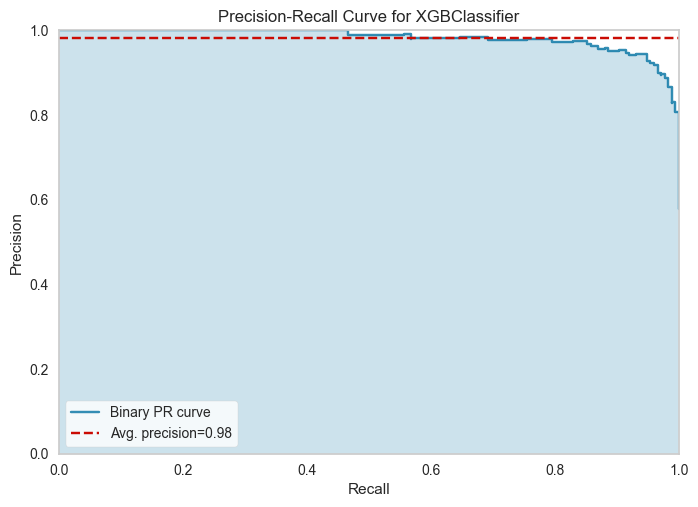

In [126]:
try:
    plot_model(default[3], 'pr')
except:
    pass

In [138]:
%%time
tuned = []
for model in default:
    print('\n\n', model.__class__.__name__)
    tuned.append(tune_model(model, n_iter=90))



 RandomForestClassifier


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9508,0.9865,0.9571,0.9571,0.9571,0.8995,0.8995
1,0.9180,0.9766,0.9857,0.8846,0.9324,0.8290,0.8369
2,0.9180,0.9755,0.9286,0.9286,0.9286,0.8324,0.8324
3,0.9262,0.9830,0.9000,0.9692,0.9333,0.8510,0.8539
4,0.9672,0.9978,0.9429,1.0000,0.9706,0.9336,0.9357
5,0.9262,0.9721,0.9155,0.9559,0.9353,0.8496,0.8507
6,0.9339,0.9796,0.9714,0.9189,0.9444,0.8630,0.8650
7,0.9339,0.9787,0.9429,0.9429,0.9429,0.8644,0.8644
8,0.8760,0.9529,0.9000,0.8873,0.8936,0.7451,0.7452


Fitting 10 folds for each of 90 candidates, totalling 900 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


 ExtraTreesClassifier


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9344,0.9860,0.9286,0.9559,0.9420,0.8666,0.8671
1,0.9180,0.9821,0.9857,0.8846,0.9324,0.8290,0.8369
2,0.9344,0.9786,0.9429,0.9429,0.9429,0.8659,0.8659
3,0.9344,0.9775,0.9143,0.9697,0.9412,0.8672,0.8692
4,0.9672,0.9978,0.9429,1.0000,0.9706,0.9336,0.9357
5,0.9098,0.9743,0.9155,0.9286,0.9220,0.8152,0.8153
6,0.9339,0.9810,0.9714,0.9189,0.9444,0.8630,0.8650
7,0.9256,0.9807,0.9429,0.9296,0.9362,0.8471,0.8472
8,0.8595,0.9605,0.9000,0.8630,0.8811,0.7096,0.7105


Fitting 10 folds for each of 90 candidates, totalling 900 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


 GradientBoostingClassifier


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9590,0.9860,0.9714,0.9577,0.9645,0.9160,0.9161
1,0.9180,0.9717,0.9857,0.8846,0.9324,0.8290,0.8369
2,0.9262,0.9777,0.9429,0.9296,0.9362,0.8488,0.8489
3,0.9344,0.9813,0.9143,0.9697,0.9412,0.8672,0.8692
4,0.9590,0.9959,0.9429,0.9851,0.9635,0.9168,0.9180
5,0.9098,0.9746,0.9296,0.9167,0.9231,0.8142,0.8143
6,0.9421,0.9742,0.9714,0.9315,0.9510,0.8804,0.8816
7,0.9256,0.9804,0.9429,0.9296,0.9362,0.8471,0.8472
8,0.8678,0.9499,0.9000,0.8750,0.8873,0.7274,0.7278


Fitting 10 folds for each of 90 candidates, totalling 900 fits


 XGBClassifier


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9508,0.9887,0.9571,0.9571,0.9571,0.8995,0.8995
1,0.9180,0.9753,1.0000,0.8750,0.9333,0.8282,0.8407
2,0.9098,0.9736,0.9143,0.9275,0.9209,0.8161,0.8162
3,0.9426,0.9821,0.9286,0.9701,0.9489,0.8836,0.8847
4,0.9754,0.9986,0.9714,0.9855,0.9784,0.9498,0.9500
5,0.9262,0.9782,0.9437,0.9306,0.9371,0.8480,0.8481
6,0.9091,0.9787,0.9571,0.8933,0.9241,0.8111,0.8141
7,0.9256,0.9689,0.9571,0.9178,0.9371,0.8463,0.8474
8,0.8678,0.9490,0.9286,0.8553,0.8904,0.7245,0.7284


Fitting 10 folds for each of 90 candidates, totalling 900 fits


 LGBMClassifier


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9508,0.9885,0.9429,0.9706,0.9565,0.8999,0.9004
1,0.9180,0.9766,0.9571,0.9054,0.9306,0.8307,0.8327
2,0.9180,0.9736,0.9286,0.9286,0.9286,0.8324,0.8324
3,0.9344,0.9727,0.9143,0.9697,0.9412,0.8672,0.8692
4,0.9508,0.9942,0.9286,0.9848,0.9559,0.9004,0.9024
5,0.9262,0.9635,0.9296,0.9429,0.9362,0.8488,0.8489
6,0.9174,0.9731,0.9429,0.9167,0.9296,0.8296,0.8301
7,0.9421,0.9622,0.9429,0.9565,0.9496,0.8817,0.8818
8,0.8760,0.9534,0.9000,0.8873,0.8936,0.7451,0.7452


Fitting 10 folds for each of 90 candidates, totalling 900 fits


 LogisticRegression


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9344,0.9843,0.9286,0.9559,0.9420,0.8666,0.8671
1,0.9180,0.9712,0.9571,0.9054,0.9306,0.8307,0.8327
2,0.9262,0.9728,0.9286,0.9420,0.9353,0.8495,0.8497
3,0.9180,0.9676,0.9000,0.9545,0.9265,0.8341,0.8359
4,0.9344,0.9956,0.8857,1.0000,0.9394,0.8685,0.8761
5,0.9016,0.9613,0.8873,0.9403,0.9130,0.8001,0.8018
6,0.8843,0.9667,0.9000,0.9000,0.9000,0.7627,0.7627
7,0.9421,0.9644,0.9429,0.9565,0.9496,0.8817,0.8818
8,0.8760,0.9535,0.8857,0.8986,0.8921,0.7465,0.7466


Fitting 10 folds for each of 90 candidates, totalling 900 fits
CPU times: total: 40.8 s
Wall time: 4min 14s


In [139]:
tuned = compare_models(include=tuned, n_select=6)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Random Forest Classifier,0.9276,0.9786,0.9372,0.9386,0.9374,0.8515,0.8530,0.0740
1,Extra Trees Classifier,0.9268,0.9796,0.9401,0.9345,0.9368,0.8497,0.8510,0.0500
2,Gradient Boosting Classifier,0.9268,0.9762,0.9430,0.9321,0.9371,0.8495,0.8508,0.0470
3,Extreme Gradient Boosting,0.9251,0.9769,0.9487,0.9254,0.9363,0.8455,0.8477,0.1120
4,Light Gradient Boosting Machine,0.9243,0.9725,0.9287,0.9403,0.9341,0.8451,0.8459,0.0470
5,Logistic Regression,0.9136,0.9697,0.9087,0.9406,0.9239,0.8240,0.8258,0.0140


In [140]:
tune_results['all_tuned_90'] = pull()

In [133]:
for key,val in tune_results.items():
    print(key)
    display(val.sort_values('Accuracy',ascending=False).style\
            .background_gradient(subset=['Accuracy','AUC','F1','Kappa','MCC'], cmap='viridis', vmin=0.8)
            .highlight_max(subset=['Accuracy','AUC','F1','Kappa','MCC'],  props='font-weight:bold')
            .format('{:.3f}', subset=val.columns[1:]))

all_default


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.928,0.979,0.937,0.939,0.937,0.852,0.853,0.569
et,Extra Trees Classifier,0.927,0.980,0.940,0.934,0.937,0.850,0.851,0.305
gbc,Gradient Boosting Classifier,0.919,0.974,0.929,0.933,0.930,0.835,0.836,0.053
xgboost,Extreme Gradient Boosting,0.919,0.975,0.933,0.928,0.930,0.833,0.834,0.026
lightgbm,Light Gradient Boosting Machine,0.915,0.976,0.929,0.926,0.927,0.826,0.827,0.066
lr,Logistic Regression,0.913,0.970,0.926,0.925,0.925,0.821,0.822,0.015
catboost,CatBoost Classifier,0.000,0.979,0.000,0.000,0.000,0.000,0.000,0.756


all_tuned_60


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Random Forest Classifier,0.928,0.979,0.937,0.939,0.937,0.852,0.853,1.116
1,Extra Trees Classifier,0.927,0.980,0.940,0.934,0.937,0.850,0.851,0.320
2,Gradient Boosting Classifier,0.927,0.976,0.943,0.932,0.937,0.850,0.851,0.048
3,Extreme Gradient Boosting,0.925,0.977,0.949,0.925,0.936,0.846,0.848,0.049
4,Light Gradient Boosting Machine,0.924,0.973,0.929,0.940,0.934,0.845,0.846,0.046
5,Logistic Regression,0.914,0.970,0.909,0.941,0.924,0.824,0.826,0.014
6,CatBoost Classifier,0.000,0.979,0.000,0.000,0.000,0.000,0.000,0.827


In [142]:
for key,val in tune_results.items():
    if key != 'all_tuned_90':
        continue
    print(key)
    display(val.sort_values('Accuracy',ascending=False).style\
            .background_gradient(subset=['Accuracy','AUC','F1','Kappa','MCC'], cmap='viridis', vmin=0.8)
            .highlight_max(subset=['Accuracy','AUC','F1','Kappa','MCC'],  props='font-weight:bold')
            .format('{:.3f}', subset=val.columns[1:]))

all_tuned_90


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Random Forest Classifier,0.928,0.979,0.937,0.939,0.937,0.852,0.853,0.074
1,Extra Trees Classifier,0.927,0.980,0.940,0.934,0.937,0.850,0.851,0.050
2,Gradient Boosting Classifier,0.927,0.976,0.943,0.932,0.937,0.850,0.851,0.047
3,Extreme Gradient Boosting,0.925,0.977,0.949,0.925,0.936,0.846,0.848,0.112
4,Light Gradient Boosting Machine,0.924,0.973,0.929,0.940,0.934,0.845,0.846,0.047
5,Logistic Regression,0.914,0.970,0.909,0.941,0.924,0.824,0.826,0.014


In [155]:
for key,val in tune_results.items():
    if key != 'select6_tuned_90':
        continue
    print(key)
    display(val.sort_values('Accuracy',ascending=False).style\
            .background_gradient(subset=['Accuracy','AUC','F1','Kappa','MCC'], cmap='viridis', vmin=0.8)
            .highlight_max(subset=['Accuracy','AUC','F1','Kappa','MCC'],  props='font-weight:bold')
            .format('{:.3f}', subset=val.columns[1:]))

select6_tuned_90


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,K Neighbors Classifier,0.933,0.976,0.943,0.942,0.942,0.863,0.865,0.016
2,Logistic Regression,0.920,0.971,0.934,0.929,0.931,0.836,0.838,0.011
1,Linear Discriminant Analysis,0.916,0.970,0.930,0.926,0.928,0.828,0.829,0.010
3,Naive Bayes,0.897,0.961,0.906,0.915,0.910,0.790,0.791,0.009


#### Select 6

In [144]:
c2 = setup(data.drop(columns='home_margin'), target = 'home_win', session_id = 42, train_size=0.8,
          verbose=False, feature_selection=True, feature_selection_method='univariate', n_features_to_select=6)

In [145]:
default = compare_models(include=['knn','lda','nb','lr',], n_select=4)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9325,0.9655,0.9430,0.9407,0.9415,0.8618,0.8626,0.4940
lda,Linear Discriminant Analysis,0.9161,0.9699,0.9301,0.9262,0.9276,0.8277,0.8292,0.2800
lr,Logistic Regression,0.9152,0.9705,0.9301,0.9245,0.9267,0.8262,0.8276,0.0110
nb,Naive Bayes,0.8922,0.9599,0.9002,0.9125,0.9058,0.7798,0.7813,0.0100


In [146]:
tune_results['select6_default'] = pull()

In [151]:
%%time

tuned = []

for model in default:
    print('\n\n', model.__class__.__name__)
    tuned.append(tune_model(model, n_iter=150))



 KNeighborsClassifier


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9508,0.9867,0.9429,0.9706,0.9565,0.8999,0.9004
1,0.9672,0.9857,1.0000,0.9459,0.9722,0.9323,0.9344
2,0.9098,0.9650,0.9143,0.9275,0.9209,0.8161,0.8162
3,0.9344,0.9676,0.9429,0.9429,0.9429,0.8659,0.8659
4,0.9508,0.9960,0.9286,0.9848,0.9559,0.9004,0.9024
5,0.9344,0.9700,0.9296,0.9565,0.9429,0.8660,0.8665
6,0.9421,0.9843,0.9857,0.9200,0.9517,0.8798,0.8830
7,0.9421,0.9741,0.9429,0.9565,0.9496,0.8817,0.8818
8,0.8843,0.9518,0.9286,0.8784,0.9028,0.7602,0.7620


Fitting 10 folds for each of 150 candidates, totalling 1500 fits


 LinearDiscriminantAnalysis


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9262,0.9876,0.9429,0.9296,0.9362,0.8488,0.8489
1,0.9262,0.9786,0.9857,0.8961,0.9388,0.8465,0.8526
2,0.9262,0.9728,0.9286,0.9420,0.9353,0.8495,0.8497
3,0.9098,0.9613,0.9000,0.9403,0.9197,0.8170,0.8180
4,0.9426,0.9882,0.9286,0.9701,0.9489,0.8836,0.8847
5,0.9098,0.9652,0.9155,0.9286,0.9220,0.8152,0.8153
6,0.9256,0.9843,0.9714,0.9067,0.9379,0.8454,0.8486
7,0.9256,0.9585,0.9286,0.9420,0.9353,0.8479,0.8480
8,0.8678,0.9417,0.9143,0.8649,0.8889,0.7259,0.7276


Fitting 10 folds for each of 36 candidates, totalling 360 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


 LogisticRegression


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9344,0.9871,0.9429,0.9429,0.9429,0.8659,0.8659
1,0.9344,0.9758,0.9857,0.9079,0.9452,0.8639,0.8685
2,0.9262,0.9712,0.9571,0.9178,0.9371,0.8480,0.8491
3,0.9344,0.9665,0.9286,0.9559,0.9420,0.8666,0.8671
4,0.9344,0.9912,0.9000,0.9844,0.9403,0.8679,0.8722
5,0.9262,0.9677,0.9296,0.9429,0.9362,0.8488,0.8489
6,0.9256,0.9815,0.9714,0.9067,0.9379,0.8454,0.8486
7,0.9339,0.9613,0.9429,0.9429,0.9429,0.8644,0.8644
8,0.8595,0.9479,0.9000,0.8630,0.8811,0.7096,0.7105


Fitting 10 folds for each of 150 candidates, totalling 1500 fits


 GaussianNB


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9344,0.9849,0.9286,0.9559,0.9420,0.8666,0.8671
1,0.9180,0.9761,0.9714,0.8947,0.9315,0.8299,0.8343
2,0.8934,0.9736,0.9000,0.9130,0.9065,0.7827,0.7828
3,0.8934,0.9577,0.8857,0.9254,0.9051,0.7837,0.7847
4,0.9098,0.9706,0.9000,0.9403,0.9197,0.8170,0.8180
5,0.8689,0.9517,0.8451,0.9231,0.8824,0.7349,0.7385
6,0.9339,0.9689,0.9714,0.9189,0.9444,0.8630,0.8650
7,0.9008,0.9473,0.9286,0.9028,0.9155,0.7956,0.7960
8,0.8347,0.9286,0.8429,0.8676,0.8551,0.6629,0.6632


Fitting 10 folds for each of 28 candidates, totalling 280 fits
CPU times: total: 13.8 s
Wall time: 24 s


In [152]:
tuned = compare_models(include=tuned, n_select=7)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,K Neighbors Classifier,0.9333,0.9756,0.9430,0.9424,0.9423,0.8634,0.8645,0.0160
2,Logistic Regression,0.9202,0.9710,0.9344,0.9290,0.9311,0.8362,0.8378,0.0110
1,Linear Discriminant Analysis,0.9161,0.9699,0.9301,0.9262,0.9276,0.8277,0.8292,0.0090
3,Naive Bayes,0.8972,0.9609,0.9059,0.9154,0.9101,0.7900,0.7914,0.0090


In [153]:
tune_results['select6_tuned_150'] = pull()

In [154]:
for key,val in tune_results.items():
    print(key)
    display(val.sort_values('Accuracy',ascending=False).style\
            .background_gradient(subset=['Accuracy','AUC','F1','Kappa','MCC'], cmap='viridis', vmin=0.8)
            .highlight_max(subset=['Accuracy','AUC','F1','Kappa','MCC'],  props='font-weight:bold')
            .format('{:.3f}', subset=val.columns[1:]))

select6_default


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.932,0.966,0.943,0.941,0.942,0.862,0.863,0.494
lda,Linear Discriminant Analysis,0.916,0.970,0.930,0.926,0.928,0.828,0.829,0.280
lr,Logistic Regression,0.915,0.971,0.930,0.924,0.927,0.826,0.828,0.011
nb,Naive Bayes,0.892,0.960,0.900,0.912,0.906,0.780,0.781,0.010


select6_tuned_90


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,K Neighbors Classifier,0.933,0.976,0.943,0.942,0.942,0.863,0.865,0.016
2,Logistic Regression,0.920,0.971,0.934,0.929,0.931,0.836,0.838,0.011
1,Linear Discriminant Analysis,0.916,0.970,0.930,0.926,0.928,0.828,0.829,0.010
3,Naive Bayes,0.897,0.961,0.906,0.915,0.910,0.790,0.791,0.009


select6_tuned_150


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,K Neighbors Classifier,0.933,0.976,0.943,0.942,0.942,0.863,0.865,0.016
2,Logistic Regression,0.920,0.971,0.934,0.929,0.931,0.836,0.838,0.011
1,Linear Discriminant Analysis,0.916,0.970,0.930,0.926,0.928,0.828,0.829,0.009
3,Naive Bayes,0.897,0.961,0.906,0.915,0.910,0.790,0.791,0.009


### Regression

#### Tuning Studies
   - *all data*: random forest, extra trees, gradient boosting, XGB, CatBoost, Huber
     - **60 iterations (10 mins): CatBoost and Extra Trees *did not* change hyperparameters, others improved**
   - *select 6 features*: linear regression, ridge least angle, bayesian ridge, kNN
     - **90 iterations: only kNN and Ridge changed hyperparameters, both improved**
     - *150 iterations: same result as above*
   - final models:
     - CatBoost, XGB
       - CatBoost does not improve with tuning. either set custom grid or increase iterations?
     - kNN, Ridge

In [9]:
from pycaret.regression import *

In [67]:
tune_results = {}

#### Results

In [37]:
# manual vmax for background gradients due to extremely (bad) LAR results for all data, normalized

#model_names = results['select 6 tuned'].Model

for key,val in tune_results.items():
    print(key)
    display(val.sort_values('R2',ascending=False).style\
            .background_gradient(subset=['R2'], cmap='viridis', )
            .background_gradient(subset=['MAE'], cmap='viridis_r', )
            .background_gradient(subset=['RMSE'], cmap='viridis_r', )
            .background_gradient(subset=['MAPE'], cmap='viridis_r', )
            .highlight_max(subset=['R2'],  props='font-weight:bold')
            .highlight_min(subset=['MAE','RMSE','MAPE'],  props='font-weight:bold')
            .format('{:.3f}', subset=val.columns[1:]))
    print('\n')

all_default


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,1.584,6.412,2.490,0.886,0.416,0.497,0.742
gbr,Gradient Boosting Regressor,1.792,7.529,2.711,0.866,0.448,0.558,0.050
et,Extra Trees Regressor,1.802,7.585,2.725,0.864,0.430,0.562,0.068
lightgbm,Light Gradient Boosting Machine,1.779,7.589,2.735,0.864,0.430,0.557,0.066
rf,Random Forest Regressor,1.871,7.987,2.804,0.857,0.449,0.594,0.135
xgboost,Extreme Gradient Boosting,1.869,8.055,2.813,0.857,0.452,0.576,0.043
huber,Huber Regressor,1.488,9.511,2.949,0.832,0.364,0.492,0.014




all_tuned_60


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,CatBoost Regressor,1.584,6.412,2.490,0.886,0.416,0.497,0.592
5,Extreme Gradient Boosting,1.667,6.988,2.611,0.876,0.427,0.513,0.172
1,Gradient Boosting Regressor,1.682,7.074,2.628,0.874,0.427,0.530,0.050
3,Light Gradient Boosting Machine,1.833,7.538,2.718,0.866,0.446,0.569,0.023
2,Extra Trees Regressor,1.802,7.585,2.725,0.864,0.430,0.562,0.064
4,Random Forest Regressor,1.864,7.768,2.761,0.861,0.441,0.543,0.140
6,Huber Regressor,1.494,9.200,2.901,0.838,0.364,0.493,0.013


In [28]:
# manual vmax for background gradients due to extremely (bad) LAR results for all data, normalized

#model_names = results['select 6 tuned'].Model

for key,val in tune_results.items():
#     if key not in ['select 6 tuned', 'all data, zscore normalized', 'select 6, no scaling']:
#         continue
    
    print(key)
    # val = val[val.Model.isin(model_names)]
    display(val.sort_values('R2',ascending=False).style\
            .background_gradient(subset=['R2'], cmap='viridis', )
            .background_gradient(subset=['MAE'], cmap='viridis_r', )
            .background_gradient(subset=['RMSE'], cmap='viridis_r', )
            .background_gradient(subset=['MAPE'], cmap='viridis_r', )
            .highlight_max(subset=['R2'],  props='font-weight:bold')
            .highlight_min(subset=['MAE','RMSE','MAPE'],  props='font-weight:bold')
            .format('{:.3f}', subset=val.columns[1:]))
    print('\n')

reg_6_default


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,1.800,7.839,2.767,0.859,0.419,0.549,0.014
lr,Linear Regression,1.745,8.116,2.799,0.855,0.437,0.554,0.489
lar,Least Angle Regression,1.746,8.117,2.799,0.855,0.437,0.555,0.009
ridge,Ridge Regression,1.742,8.112,2.798,0.855,0.433,0.554,0.259
br,Bayesian Ridge,1.755,8.185,2.812,0.854,0.435,0.557,0.009




reg_6_tuned


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,K Neighbors Regressor,1.730,7.524,2.712,0.865,0.406,0.521,0.012
3,Ridge Regression,1.742,8.100,2.796,0.856,0.434,0.553,0.008
1,Linear Regression,1.745,8.116,2.799,0.855,0.437,0.554,0.008
2,Least Angle Regression,1.746,8.117,2.799,0.855,0.437,0.555,0.009
4,Bayesian Ridge,1.755,8.185,2.812,0.854,0.435,0.557,0.009




reg_6_tuned_150


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,K Neighbors Regressor,1.730,7.524,2.712,0.865,0.406,0.521,0.014
3,Ridge Regression,1.742,8.100,2.796,0.856,0.434,0.553,0.010
1,Linear Regression,1.745,8.116,2.799,0.855,0.437,0.554,0.009
2,Least Angle Regression,1.746,8.117,2.799,0.855,0.437,0.555,0.010
4,Bayesian Ridge,1.755,8.185,2.812,0.854,0.435,0.557,0.008


#### All Data

In [68]:
s1 = setup(data.drop(columns='home_win'), target = 'home_margin', session_id = 42,  train_size=0.8,
           )

,Description,Value
0,Session id,42
1,Target,home_margin
2,Target type,Regression
3,Original data shape,"(1521, 13)"
4,Transformed data shape,"(1521, 13)"
5,Transformed train set shape,"(1216, 13)"
6,Transformed test set shape,"(305, 13)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


In [69]:
default = compare_models(include=['rf','et', 'gbr', 'xgboost', 'lightgbm', 'catboost', 'huber'], n_select=7)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,1.5844,6.4117,2.4904,0.8859,0.4157,0.4974,1.1780


In [70]:
tune_results['all_default'] = pull()

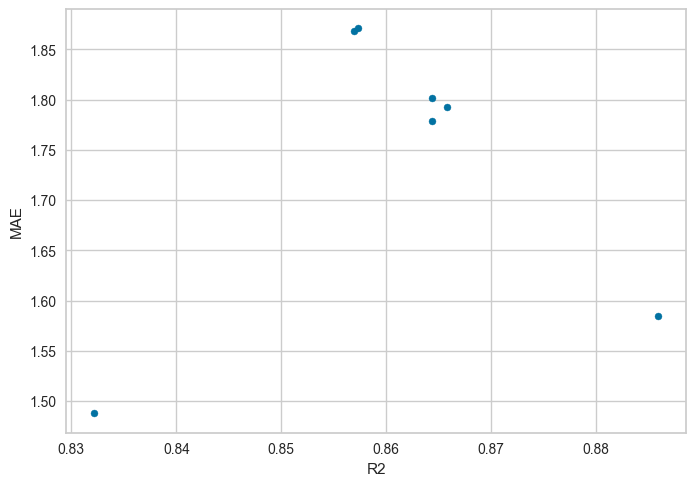

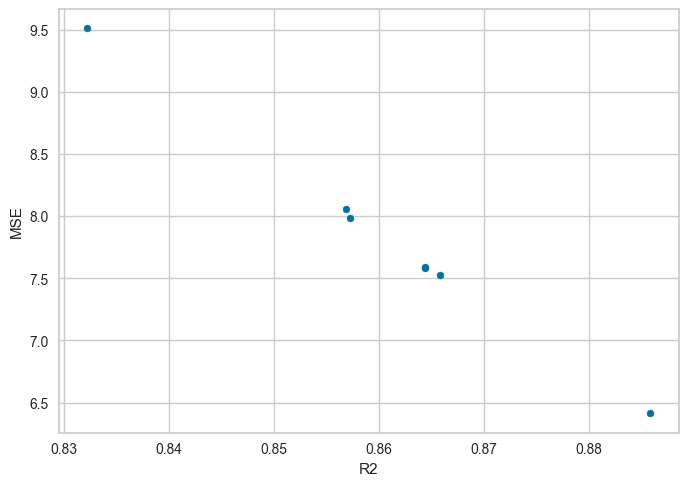

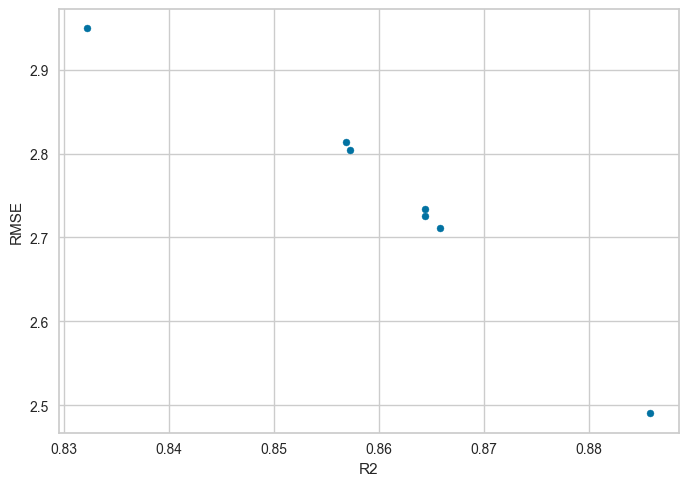

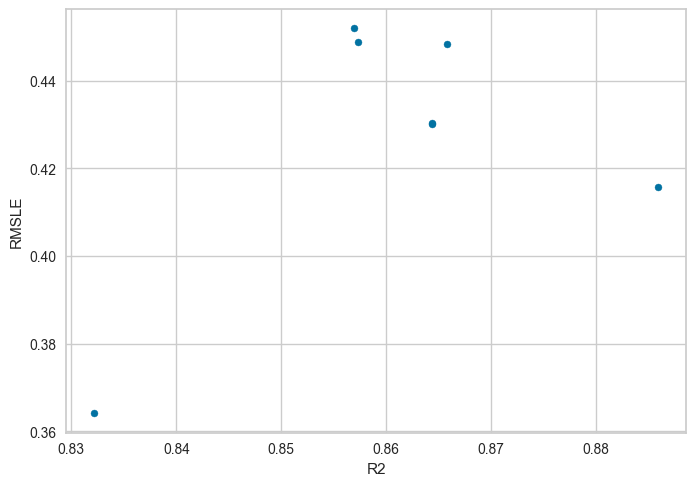

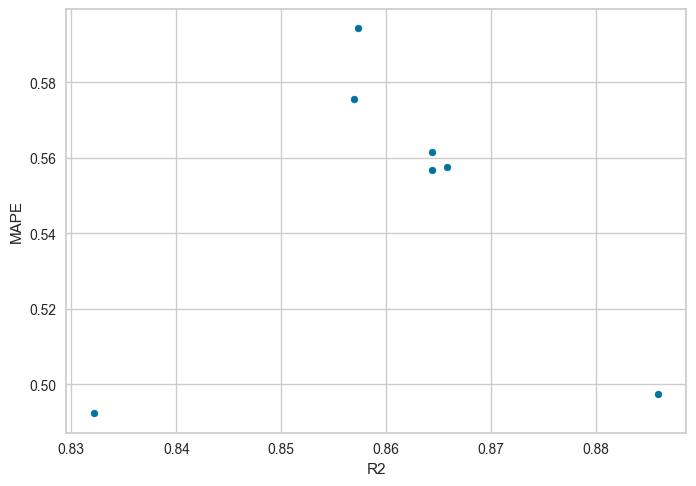

In [33]:
# metric optimization check, R2 ranks matchup reasonably well.
x = tune_results['all_default']['R2']
for met in ['MAE','MSE','RMSE','RMSLE','MAPE']:   
    y = tune_results['all_default'][met] 
    plt.scatter(x,y, s=25)
    plt.xlabel('R2')
    plt.ylabel(met)
    plt.show()

In [72]:
%%time

tuned = []

for model in default:
    print('\n\n', model.__class__.__name__)
    tuned.append(tune_model(model, n_iter=60))

TypeError: 'CatBoostRegressor' object is not iterable

In [35]:
tuned = compare_models(include=tuned, n_select=7)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,CatBoost Regressor,1.5844,6.4117,2.4904,0.8859,0.4157,0.4974,0.5920
5,Extreme Gradient Boosting,1.6670,6.9877,2.6110,0.8756,0.4268,0.5133,0.1720
1,Gradient Boosting Regressor,1.6823,7.0740,2.6277,0.8740,0.4270,0.5300,0.0500
3,Light Gradient Boosting Machine,1.8327,7.5384,2.7182,0.8655,0.4456,0.5687,0.0230
2,Extra Trees Regressor,1.8019,7.5854,2.7252,0.8644,0.4301,0.5616,0.0640
4,Random Forest Regressor,1.8637,7.7684,2.7609,0.8610,0.4410,0.5429,0.1400
6,Huber Regressor,1.4937,9.1999,2.9010,0.8377,0.3639,0.4935,0.0130


In [36]:
tune_results['all_tuned_60'] = pull()

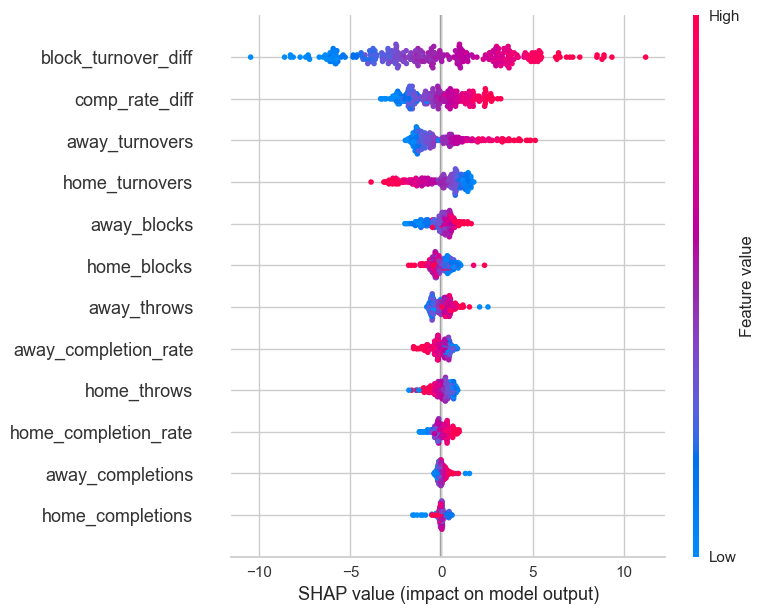

In [39]:
interpret_model(tuned[0])

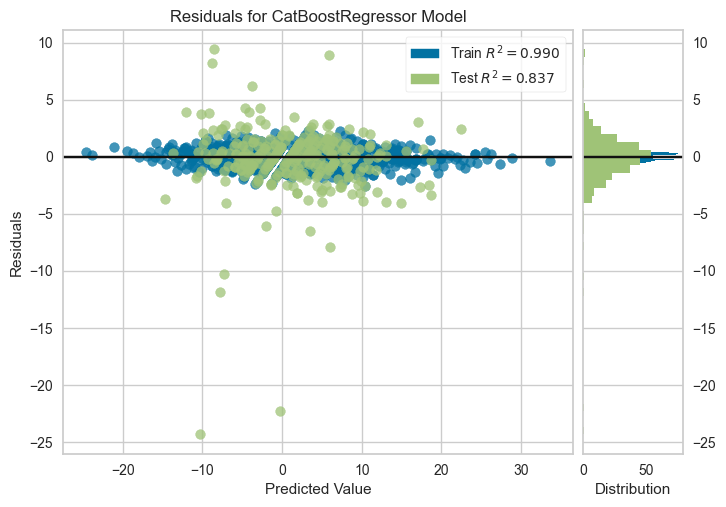

In [44]:
plot_model(tuned[0], 'residuals')


KeyboardInterrupt



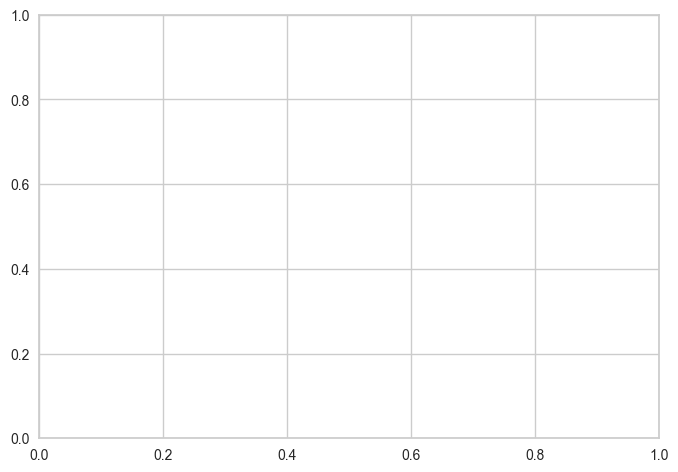

In [45]:
plot_model(tuned[0], 'rfe')

#### Select 6 features

In [46]:
s3 = setup(data.drop(columns='home_win'), target = 'home_margin', session_id = 42,  train_size=0.8,
          feature_selection=True, feature_selection_method='univariate', n_features_to_select=6)

,Description,Value
0,Session id,42
1,Target,home_margin
2,Target type,Regression
3,Original data shape,"(1521, 13)"
4,Transformed data shape,"(1521, 7)"
5,Transformed train set shape,"(1216, 7)"
6,Transformed test set shape,"(305, 7)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


In [47]:
default = compare_models(include=['lr', 'ridge', 'lar', 'br', 'knn'], n_select=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,1.7995,7.8389,2.7671,0.8591,0.4193,0.5487,0.0140
lr,Linear Regression,1.7452,8.1160,2.7988,0.8554,0.4369,0.5545,0.4880
lar,Least Angle Regression,1.7457,8.1169,2.7991,0.8553,0.4371,0.5547,0.0110
ridge,Ridge Regression,1.7416,8.1123,2.7980,0.8552,0.4329,0.5537,0.2640
br,Bayesian Ridge,1.7549,8.1851,2.8123,0.8538,0.4350,0.5573,0.0100


In [12]:
tune_results['reg_6_default'] = pull()

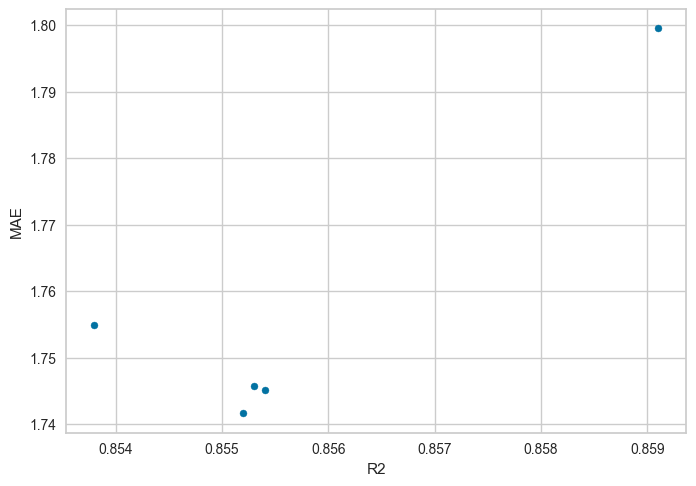

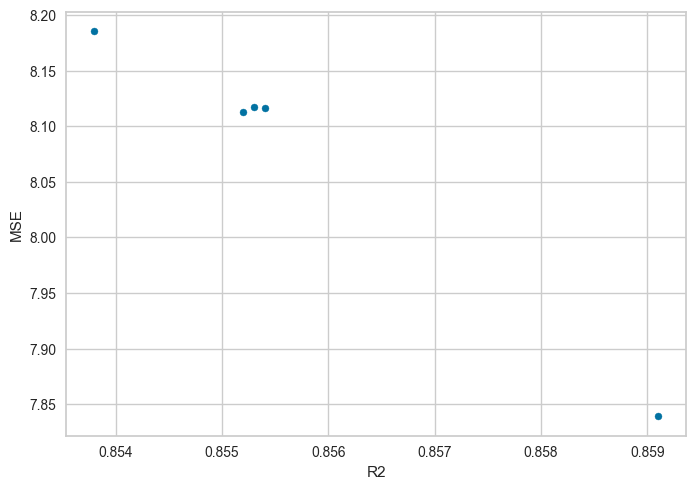

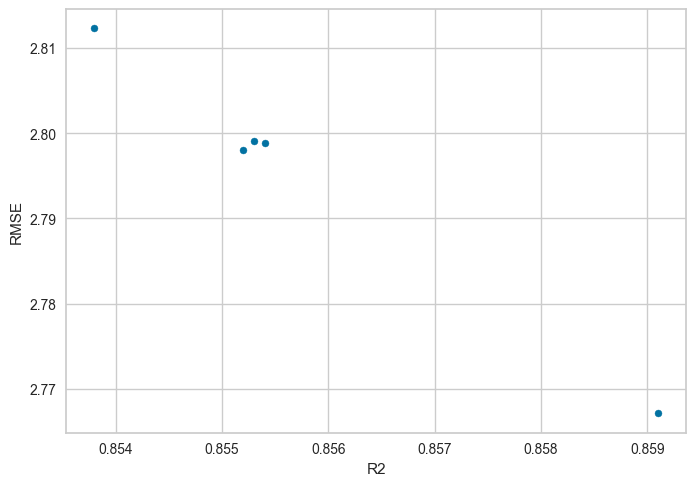

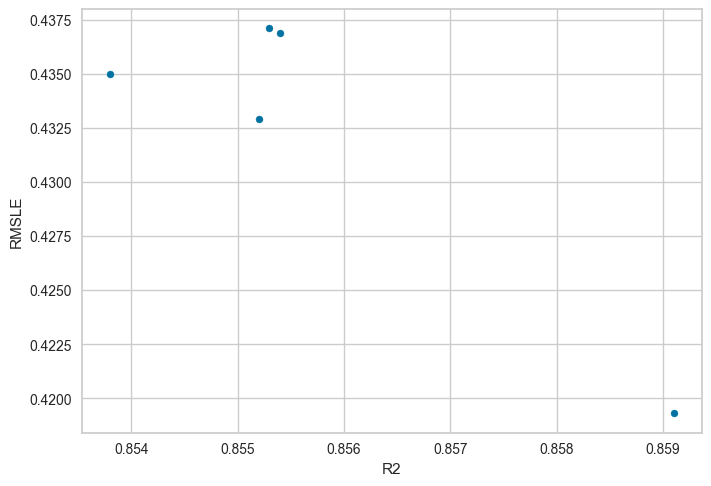

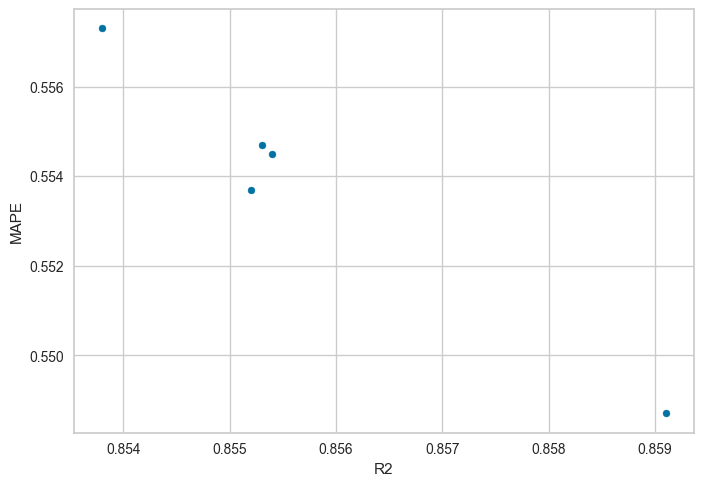

In [18]:
# metric optimization check, R2 ranks matchup reasonably well.
x = tune_results['reg_6_default']['R2']
for met in ['MAE','MSE','RMSE','RMSLE','MAPE']:   
    y = tune_results['reg_6_default'][met] 
    plt.scatter(x,y, s=25)
    plt.xlabel('R2')
    plt.ylabel(met)
    plt.show()

In [48]:
tuned = []

for model in default:
    print(model.__class__.__name__)
    tuned.append(tune_model(model, n_iter=60))

KNeighborsRegressor


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.6845,7.4267,2.7252,0.8382,0.3841,0.5763
1,1.6935,6.0397,2.4576,0.9011,0.3953,0.5455
2,1.8516,8.8377,2.9728,0.8402,0.4561,0.4456
3,1.7965,7.7352,2.7812,0.8737,0.4111,0.4259
4,1.5088,3.7927,1.9475,0.9391,0.3744,0.5056
5,1.6088,5.9467,2.4386,0.9031,0.4293,0.5864
6,1.6883,5.8098,2.4104,0.8771,0.4093,0.5413
7,1.8581,9.5095,3.0838,0.8191,0.3675,0.5215
8,1.6596,7.6738,2.7702,0.8610,0.4121,0.4472


Fitting 10 folds for each of 60 candidates, totalling 600 fits
LinearRegression


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.8035,8.3519,2.8900,0.8180,0.4266,0.6196
1,1.7416,7.0582,2.6567,0.8844,0.4894,0.5269
2,1.8167,8.1836,2.8607,0.8521,0.4591,0.4784
3,1.7793,10.1241,3.1818,0.8347,0.3895,0.4555
4,1.5302,3.6576,1.9125,0.9413,0.4162,0.5730
5,1.6878,7.7297,2.7802,0.8741,0.4753,0.6649
6,1.6063,4.2335,2.0575,0.9104,0.4174,0.5497
7,1.8130,9.5076,3.0834,0.8191,0.3708,0.5113
8,1.6290,7.0983,2.6643,0.8714,0.4483,0.4870


Fitting 10 folds for each of 2 candidates, totalling 20 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
Lars


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.8035,8.3519,2.8900,0.8180,0.4266,0.6196
1,1.7416,7.0582,2.6567,0.8844,0.4894,0.5269
2,1.8167,8.1836,2.8607,0.8521,0.4591,0.4784
3,1.7793,10.1241,3.1818,0.8347,0.3895,0.4555
4,1.5334,3.6741,1.9168,0.9410,0.4176,0.5745
5,1.6878,7.7297,2.7802,0.8741,0.4753,0.6649
6,1.6063,4.2335,2.0575,0.9104,0.4174,0.5497
7,1.8140,9.5000,3.0822,0.8192,0.3711,0.5118
8,1.6290,7.0983,2.6643,0.8714,0.4483,0.4870


Fitting 10 folds for each of 22 candidates, totalling 220 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
Ridge


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.8213,8.4908,2.9139,0.8150,0.4247,0.6239
1,1.6823,6.5150,2.5524,0.8933,0.4677,0.5083
2,1.7702,7.8757,2.8064,0.8576,0.4430,0.4648
3,1.7700,10.4307,3.2297,0.8297,0.3889,0.4504
4,1.5337,3.6731,1.9165,0.9410,0.4170,0.5786
5,1.6820,7.6488,2.7657,0.8754,0.4733,0.6658
6,1.6405,4.4358,2.1061,0.9061,0.4284,0.5649
7,1.8235,9.5551,3.0911,0.8182,0.3702,0.5136
8,1.6371,7.1975,2.6828,0.8696,0.4405,0.4870


Fitting 10 folds for each of 60 candidates, totalling 600 fits
BayesianRidge


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.8638,8.8169,2.9693,0.8079,0.4248,0.6353
1,1.6641,6.4353,2.5368,0.8946,0.4710,0.5091
2,1.7162,7.4691,2.7330,0.8650,0.4498,0.4500
3,1.7575,10.5704,3.2512,0.8274,0.3895,0.4417
4,1.5765,3.8216,1.9549,0.9387,0.4192,0.5927
5,1.6955,7.5709,2.7515,0.8767,0.4754,0.6717
6,1.6696,4.6634,2.1595,0.9013,0.4367,0.5775
7,1.8483,9.7159,3.1170,0.8151,0.3722,0.5183
8,1.6648,7.4499,2.7294,0.8650,0.4326,0.4904


Fitting 10 folds for each of 60 candidates, totalling 600 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [49]:
tuned = compare_models(include=tuned, n_select=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,K Neighbors Regressor,1.7296,7.5235,2.7118,0.8646,0.4059,0.5208,0.0130
1,Linear Regression,1.7452,8.1160,2.7988,0.8554,0.4369,0.5545,0.0100
3,Ridge Regression,1.7410,8.1061,2.7968,0.8554,0.4330,0.5535,0.0100
2,Least Angle Regression,1.7457,8.1169,2.7991,0.8553,0.4371,0.5547,0.0120
4,Bayesian Ridge,1.7549,8.1851,2.8123,0.8538,0.4350,0.5573,0.0100


In [50]:
tune_results['reg_6_tuned_60'] = pull()

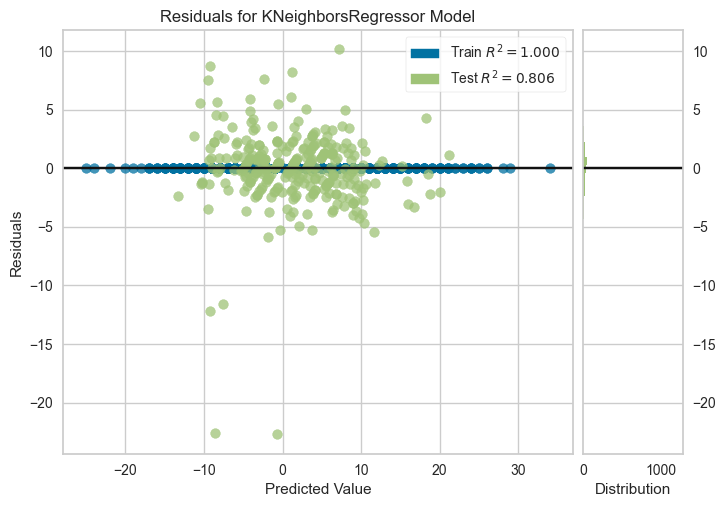

In [64]:
plot_model(tuned[0], 'residuals')

LinearRegression


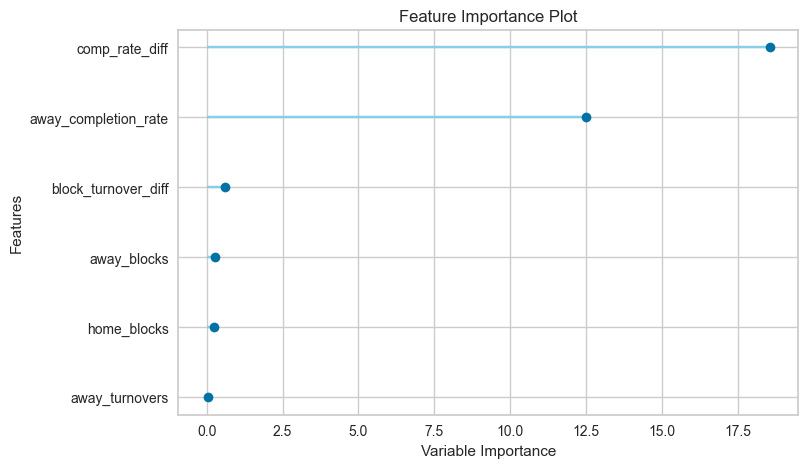

Ridge


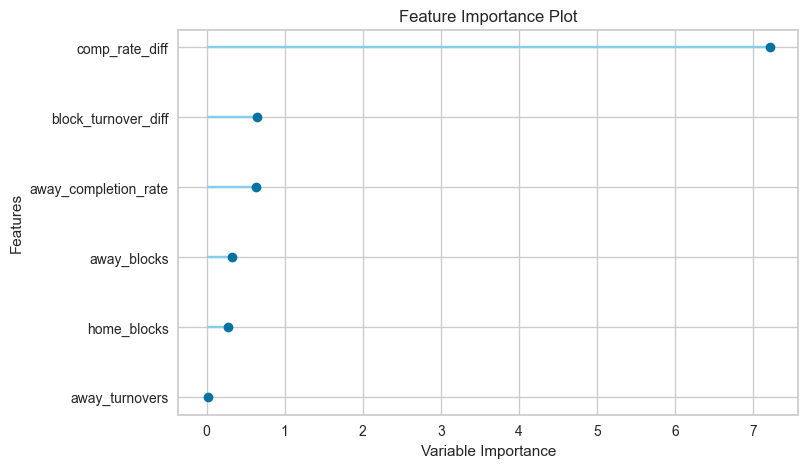

Lars


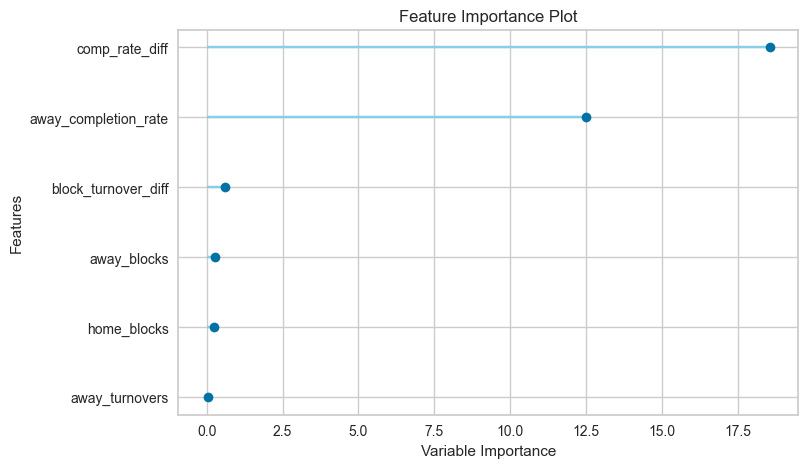

BayesianRidge


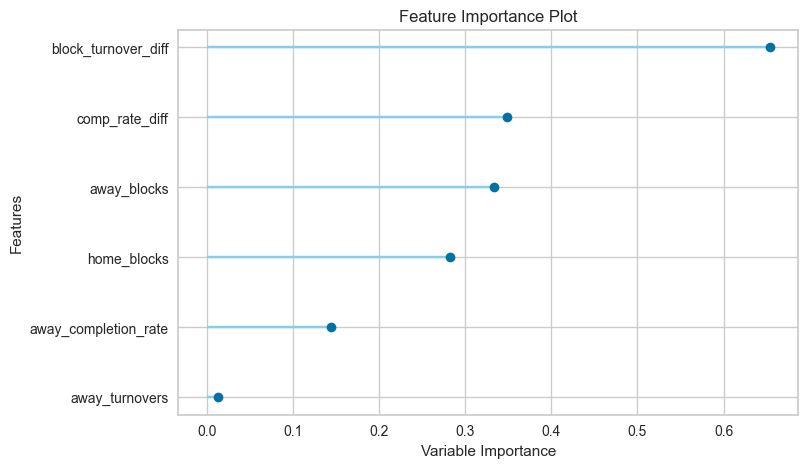

In [66]:
for i in range(1,5):
    print(tuned[i].__class__.__name__)
    plot_model(tuned[i], 'feature')
               